In [1]:
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder

In [2]:
normal_directory = "Normal"
attack_directory = "Attack"

# Create lists to store normal and attack DataFrames
normal_dataframes = []
attack_dataframes = []

# Loop through normal traffic files
for filename in os.listdir(normal_directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(normal_directory, filename)
        df = pd.read_csv(file_path)
        normal_dataframes.append(df)

# Loop through attack traffic files
for filename in os.listdir(attack_directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(attack_directory, filename)
        df = pd.read_csv(file_path)
        attack_dataframes.append(df)

# Concatenate normal and attack DataFrames separately
normal_concatenated_df = pd.concat(normal_dataframes, ignore_index=True)
attack_concatenated_df = pd.concat(attack_dataframes, ignore_index=True)

# Assign labels to the concatenated DataFrames
normal_concatenated_df['label'] = 'normal'
attack_concatenated_df['label'] = 'attack'

# Combine normal and attack DataFrames into a single DataFrame
combined_df = pd.concat([normal_concatenated_df, attack_concatenated_df], ignore_index=True)

In [3]:
combined_df.to_csv('combined_df.csv')

In [4]:
combined_df=pd.read_csv('/kaggle/input/sipsignal/combined_df.csv')

In [5]:
combined_df['label'].value_counts()

label
normal    3259385
attack    1180940
Name: count, dtype: int64

In [6]:
combined_df[combined_df['label']=='attack']

,Unnamed: 0,No.,Time,Source,Destination,Protocol,Length,Info,label
3259385,3259385,1,0.000000,172.168.1.44,192.168.1.127,DISCARD,1118,Discard,attack
3259386,3259386,2,0.000012,172.168.1.44,192.168.1.127,DISCARD,1118,Discard,attack
3259387,3259387,3,0.000017,172.168.1.44,192.168.1.127,DISCARD,1118,Discard,attack
3259388,3259388,4,0.000022,172.168.1.44,192.168.1.127,DISCARD,1118,Discard,attack
3259389,3259389,5,0.000026,172.168.1.44,192.168.1.127,DISCARD,1118,Discard,attack
...,...,...,...,...,...,...,...,...,...
4440320,4440320,2,0.001746,192.168.1.127,172.168.1.44,SIP,485,Status: 200 OK (BYE) |,attack
4440321,4440321,3,198.950144,172.168.1.44,192.168.1.127,SIP,440,Request: BYE sip:User2@10.10.10.22:5060 |,attack
4440322,4440322,4,198.951307,192.168.1.127,172.168.1.44,SIP,507,Status: 481 Call leg/transaction does not exis...,attack
4440323,4440323,5,322.618218,172.168.1.44,192.168.1.127,SIP,440,Request: BYE sip:User4@10.10.10.38:5060 |,attack


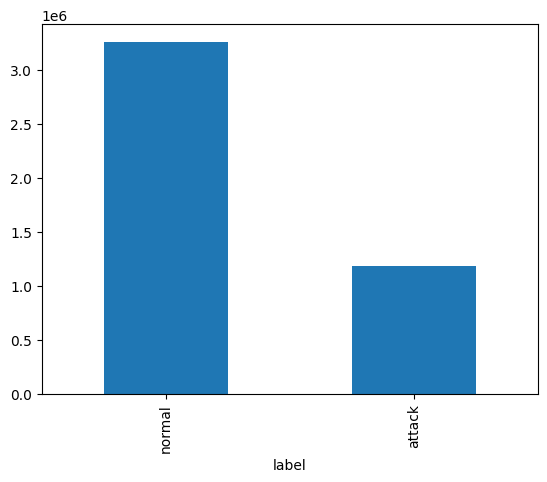

In [7]:
import matplotlib.pyplot as plt
combined_df['label'].value_counts().plot(kind='bar')
plt.show()

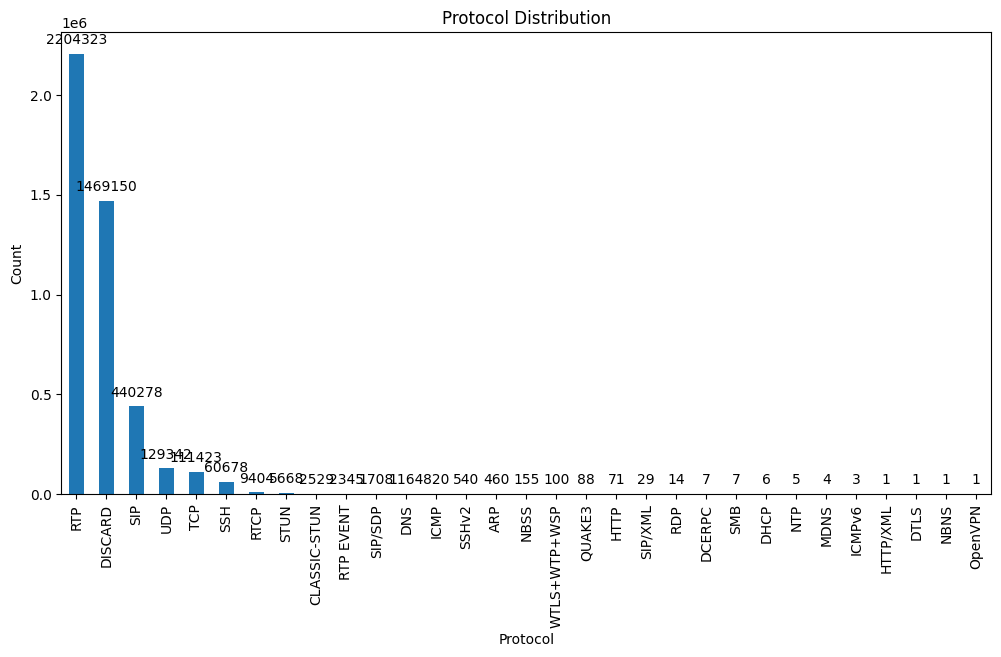

In [8]:
plt.figure(figsize=(12, 6))
ax = combined_df['Protocol'].value_counts().plot(kind='bar')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Protocol Distribution')

# Adding count numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [9]:
import ipaddress
import re

def convert_address_to_numeric(address):
    if ':' in address:
        # MAC address
        mac_address = re.sub(r':', '', address)
        return int(mac_address, 16)
    else:
        # IPv4 address
        try:
            return int(ipaddress.IPv4Address(address))
        except ValueError:
            # Handle non-IPv4 addresses
            return address


In [10]:
combined_df = combined_df[(combined_df['Source'].apply(lambda x: '.' in x or ':' in x)) &
                          (combined_df['Destination'].apply(lambda x: '.' in x or ':' in x))]

# Apply the convert_address_to_numeric function
combined_df['Source'] = combined_df['Source'].apply(convert_address_to_numeric)
combined_df['Destination'] = combined_df['Destination'].apply(convert_address_to_numeric)

In [11]:
combined_df = combined_df.drop(['No.','Info'], axis=1)

In [12]:
combined_df = combined_df.drop('Unnamed: 0', axis=1)

In [13]:
combined_df

,Time,Source,Destination,Protocol,Length,label
0,0.000000,3232235903,168430119,SIP,628,normal
1,0.029567,168430119,3232235903,SIP,322,normal
2,0.961820,168430102,3232235903,UDP,46,normal
3,2.284579,168430118,3232235903,UDP,46,normal
4,3.120610,168430114,3232235903,UDP,46,normal
...,...,...,...,...,...,...
4440320,0.001746,3232235903,2896691500,SIP,485,attack
4440321,198.950144,2896691500,3232235903,SIP,440,attack
4440322,198.951307,3232235903,2896691500,SIP,507,attack
4440323,322.618218,2896691500,3232235903,SIP,440,attack


In [14]:
combined_df['Protocol'] = combined_df['Protocol'].astype('category')

In [15]:
protocol_dummies = pd.get_dummies(combined_df['Protocol'], prefix='Protocol')
combined_df = pd.concat([combined_df, protocol_dummies.astype(int)], axis=1)
# combined_df = combined_df.drop('Protocol', axis=1)



In [16]:
combined_df = combined_df.drop('Protocol', axis=1)

In [17]:
combined_df.columns

Index(['Time', 'Source', 'Destination', 'Length', 'label', 'Protocol_ARP',
       'Protocol_CLASSIC-STUN', 'Protocol_DCERPC', 'Protocol_DHCP',
       'Protocol_DISCARD', 'Protocol_DNS', 'Protocol_DTLS', 'Protocol_HTTP',
       'Protocol_HTTP/XML', 'Protocol_ICMP', 'Protocol_ICMPv6',
       'Protocol_MDNS', 'Protocol_NBNS', 'Protocol_NBSS', 'Protocol_NTP',
       'Protocol_OpenVPN', 'Protocol_QUAKE3', 'Protocol_RDP', 'Protocol_RTCP',
       'Protocol_RTP', 'Protocol_RTP EVENT', 'Protocol_SIP',
       'Protocol_SIP/SDP', 'Protocol_SIP/XML', 'Protocol_SMB', 'Protocol_SSH',
       'Protocol_SSHv2', 'Protocol_STUN', 'Protocol_TCP', 'Protocol_UDP',
       'Protocol_WTLS+WTP+WSP'],
      dtype='object')

In [18]:
combined_df

,Time,Source,Destination,Length,label,Protocol_ARP,Protocol_CLASSIC-STUN,Protocol_DCERPC,Protocol_DHCP,Protocol_DISCARD,...,Protocol_SIP,Protocol_SIP/SDP,Protocol_SIP/XML,Protocol_SMB,Protocol_SSH,Protocol_SSHv2,Protocol_STUN,Protocol_TCP,Protocol_UDP,Protocol_WTLS+WTP+WSP
0,0.000000,3232235903,168430119,628,normal,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.029567,168430119,3232235903,322,normal,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.961820,168430102,3232235903,46,normal,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2.284579,168430118,3232235903,46,normal,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3.120610,168430114,3232235903,46,normal,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440320,0.001746,3232235903,2896691500,485,attack,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4440321,198.950144,2896691500,3232235903,440,attack,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4440322,198.951307,3232235903,2896691500,507,attack,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4440323,322.618218,2896691500,3232235903,440,attack,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [19]:
combined_df['Source'] = combined_df['Source'].astype(float)

In [20]:
combined_df

,Time,Source,Destination,Length,label,Protocol_ARP,Protocol_CLASSIC-STUN,Protocol_DCERPC,Protocol_DHCP,Protocol_DISCARD,...,Protocol_SIP,Protocol_SIP/SDP,Protocol_SIP/XML,Protocol_SMB,Protocol_SSH,Protocol_SSHv2,Protocol_STUN,Protocol_TCP,Protocol_UDP,Protocol_WTLS+WTP+WSP
0,0.000000,3.232236e+09,168430119,628,normal,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.029567,1.684301e+08,3232235903,322,normal,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.961820,1.684301e+08,3232235903,46,normal,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2.284579,1.684301e+08,3232235903,46,normal,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3.120610,1.684301e+08,3232235903,46,normal,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440320,0.001746,3.232236e+09,2896691500,485,attack,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4440321,198.950144,2.896692e+09,3232235903,440,attack,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4440322,198.951307,3.232236e+09,2896691500,507,attack,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4440323,322.618218,2.896692e+09,3232235903,440,attack,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
from imblearn.under_sampling import NearMiss

#Split the data into features and target
X = combined_df.drop('label', axis=1)
y = combined_df['label']

from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(1889444, 35)

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1889444 entries, 2111835 to 3080916
Data columns (total 35 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Time                   float64
 1   Source                 float64
 2   Destination            int64  
 3   Length                 int64  
 4   Protocol_ARP           int64  
 5   Protocol_CLASSIC-STUN  int64  
 6   Protocol_DCERPC        int64  
 7   Protocol_DHCP          int64  
 8   Protocol_DISCARD       int64  
 9   Protocol_DNS           int64  
 10  Protocol_DTLS          int64  
 11  Protocol_HTTP          int64  
 12  Protocol_HTTP/XML      int64  
 13  Protocol_ICMP          int64  
 14  Protocol_ICMPv6        int64  
 15  Protocol_MDNS          int64  
 16  Protocol_NBNS          int64  
 17  Protocol_NBSS          int64  
 18  Protocol_NTP           int64  
 19  Protocol_OpenVPN       int64  
 20  Protocol_QUAKE3        int64  
 21  Protocol_RDP           int64  
 22  Protocol_RTCP    

In [25]:
y_train

2111835    normal
1809264    normal
4354642    attack
3476930    attack
3296222    attack
            ...  
3369653    attack
1064525    normal
1300897    normal
415258     normal
3080916    normal
Name: label, Length: 1889444, dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [28]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create PyTorch datasets and data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [3]:
class CNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * (input_size // 4), 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add a channel dimension
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [30]:
input_size = X_train.shape[1]
num_classes = 2  # Binary classification (attack or normal)
model = CNN(input_size, num_classes)

# Define the loss function and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())


In [31]:
from tqdm import tqdm

In [32]:
def train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs, device):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        running_correct = 0
        total = 0
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            running_correct += (predicted == labels).sum().item()

            progress_bar.set_postfix(loss=running_loss / (len(progress_bar) + 1),
                                     accuracy=running_correct / total * 100)

        # Compute validation accuracy
        val_correct = 0
        val_total = 0
        model.eval()
        with torch.no_grad():
            for val_inputs, val_labels in val_loader:
                val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
                val_outputs = model(val_inputs)
                _, val_predicted = torch.max(val_outputs.data, 1)
                val_total += val_labels.size(0)
                val_correct += (val_predicted == val_labels).sum().item()
        
        val_accuracy = val_correct / val_total * 100
        model.train()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = running_correct / total * 100
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%, Val Accuracy: {val_accuracy:.2f}%')

    return model

In [33]:
def save_checkpoint(model, optimizer, epoch, path):
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }, path)

# Set device to GPU if available, else CPU
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# =model = model.to(device)

In [ ]:
num_epochs = 5

trained_model = train_model(model, train_loader,test_loader ,optimizer, criterion, num_epochs, device)

# Save the model checkpoint
save_checkpoint(trained_model, optimizer, num_epochs, '/kaggle/working/model_checkpoint.pth')

Epoch 1/5:  80%|████████  | 47337/59046 [03:06<00:45, 255.02it/s, accuracy=82.5, loss=5.46e+4]

In [5]:
model = CNN(1889444, 2)
model.load_state_dict(torch.load('model.pth'))
model.eval()  # Set the model to evaluation mode